<a href="https://colab.research.google.com/github/peeyushsinghal/da_cv_fer/blob/main/da_cv_fer_sfew_expw_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning repository
Importing files regarding dataset, model, mains and utils

In [1]:
!git clone https://github.com/peeyushsinghal/da_cv_fer.git
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 63 (delta 1), reused 0 (delta 0), pack-reused 57
Receiving objects: 100% (63/63), 1.52 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (27/27), done.


Installing dependencies

In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
!pip install -q opendatasets # quient install, for some reason this does not get installed with requirements

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## Libraries and Initializations

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import show_batch
from da_cv_fer.model_DANN import DANN
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import (weights_init,
                             train_model,
                             get_correct_predictions,
                             test_model)

import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np

### Initializing configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

## EXPW Dataset
Creating dataset and dataloader objects.
Split into train and val.

`details: da_cv_fer.ds_expw.EXPW`
<br>
Please be patient, it takes around 3 minutes to download data set

In [5]:
expw_obj = EXPW()
expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
in EXPW()...
Directory dataset/expwds created successfully.


100%|██████████| 7.68G/7.68G [01:10<00:00, 117MB/s] 



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
Directory dataset/expwds already exists.
Directory dataset/expwds already exists.
 length of EXPW dataset : 54476 , 54476


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


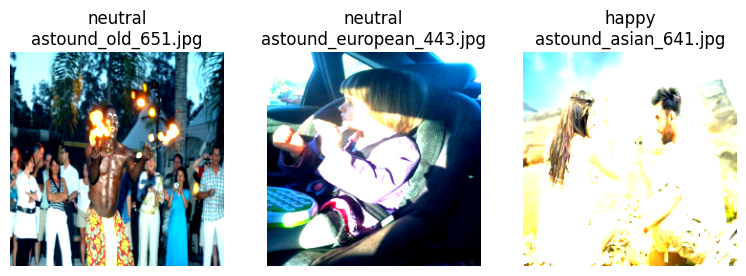

In [6]:
show_batch(expw_train_loader,expw_train_ds.labels,3)

## SFEW Dataset

Creating dataloader objects.

It copies files from a google drive, unzips it and sets that for use

details: da_cv_fer.ds_sfew.DatasetSFEW

In [7]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
sfew = DatasetSFEW()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

self.BASE_PATH -dataset,
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zi

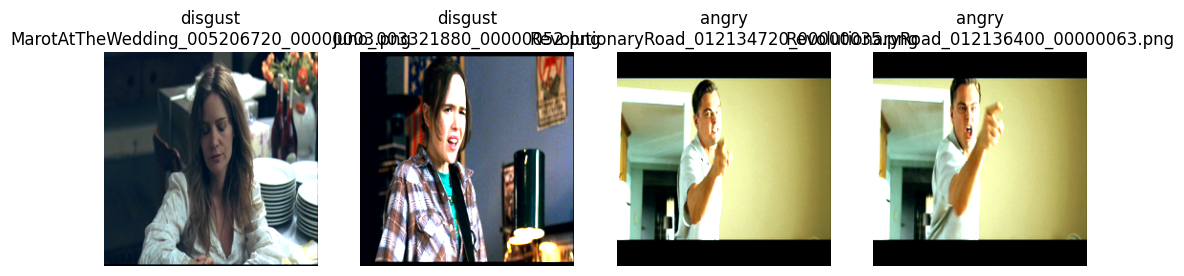

In [9]:
show_batch(sfew_train_loader,sfew.labels,4)

## Initializing Model

In [10]:
model = DANN(num_classes=7, dropout=0.1)
model

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 90.1MB/s]


DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
   

### Checking Training - one forward pass
Useful to understand input and output. Specially, sizes of input and output (including batch sizes)

In [11]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }

expw_loader = {'name': 'expw',
               'train':expw_train_loader,
               'val':expw_val_loader
               }

data_loader = {'source' : sfew_loader,
               'target' : expw_loader}

# data_loader = {'source_train_loader':sfew_train_loader,
#                'source_val_loader':sfew_val_loader,
#                'target_train_loader':expw_train_loader,
#                'target_val_loader':expw_val_loader}

In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)

cuda


In [13]:
for usage, dict_data_loader in data_loader.items(): #[sfew_train_loader,sfew_val_loader,expw_train_loader,expw_val_loader]:
    print('-'*80)
    print(usage)
    # for name, train_loader, val_loader in data_loader.items()
    for k, v in dict_data_loader.items():
      if k == 'name':
        print (f'--------{k} of dataset : {v}--------')
      else:
        print (f'   --------type : {k}--------')
        batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
        images, labels = batch[0].to(device), batch[1].to(device)
        print( "Input:\n","Input Image: ",images.shape, ",labels: ",labels.shape)

        x_labels, x_domains, x_features = model(images) # forward pass
        print("Output:\n", "labels: ", x_labels.shape, ",domains: ",x_domains.shape, ",features: ", x_features.shape)




--------------------------------------------------------------------------------
source
--------name of dataset : sfew--------
   --------type : train--------
Input:
 Input Image:  torch.Size([32, 3, 224, 224]) ,labels:  torch.Size([32, 7])
Output:
 labels:  torch.Size([32, 7]) ,domains:  torch.Size([32, 2]) ,features:  torch.Size([32, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([32, 3, 224, 224]) ,labels:  torch.Size([32, 7])
Output:
 labels:  torch.Size([32, 7]) ,domains:  torch.Size([32, 2]) ,features:  torch.Size([32, 1000])
--------------------------------------------------------------------------------
target
--------name of dataset : expw--------
   --------type : train--------
Input:
 Input Image:  torch.Size([32, 3, 224, 224]) ,labels:  torch.Size([32, 7])
Output:
 labels:  torch.Size([32, 7]) ,domains:  torch.Size([32, 2]) ,features:  torch.Size([32, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([32, 3, 224, 224]) ,labels:  to

In [14]:
# #@title Weight Initialization

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       nn.init.xavier_normal_(m.weight)
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight)
#       nn.init.zeros_(m.bias)

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       # nn.init.xavier_normal_(m.weight)
#       pass # not initialising Conv layers as they are pretrained
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight) # Linear layers are added on
#       nn.init.zeros_(m.bias)

In [15]:
# #@title Typical Training Function with Learning rate

# def train_model(model,device, data_loader, optimizer, epoch,
#                 class_loss_function = nn.CrossEntropyLoss() ):
#     print(f'epoch = {epoch+1}...in training function')

#     model.train() # setting model to training
#     model.to(device)

#     pbar = tqdm(data_loader) # putting the dataloader in progress bar

#     processed = 0 # to understand accuracy, used in denominator
#     epoch_loss = 0.0

#     for batch_idx, batch in enumerate(pbar):
#         images, labels = batch[0].to(device), batch[1].to(device) # batch of images and labels

#         optimizer.zero_grad() # setting gradients to zero to avoid accumulation

#         class_output, _ , _ = model(images) # forward pass, output = {class, domain, feature}

#         class_loss = class_loss_function(class_output,labels) # Calculate Loss
#         epoch_loss += class_loss.item()

#         class_loss.backward() #backpropogation, creating gradients

#         optimizer.step() # updating the params

#         processed += len(images)
#         curr_lr = optimizer.param_groups[0]['lr']

#         pbar.set_description(desc= f'Loss={class_loss.item()} Batch_id={batch_idx+1} Epoch Average loss={epoch_loss/processed:0.8f} LR={curr_lr:0.6f}')

#     return float("{:.8f}".format(epoch_loss/processed)),  curr_lr

In [16]:
# def get_correct_predictions(prediction, labels):
#     """
#     Function to return total number of correct predictions
#     :param prediction: Model predictions on a given sample of data
#     :param labels: Correct labels of a given sample of data
#     :return: Number of correct predictions
#     """
#     # print(prediction)
#     # print(prediction.argmax(dim=1))
#     # print(f'labels = {labels}, labels.argmax ={labels.argmax(dim=1)}')
#     # # print(prediction.argmax(dim=1).eq(labels))
#     # # print(prediction.argmax(dim=1).eq(labels).sum())
#     # # print(prediction.argmax(dim=1).eq(labels).sum().item())
#     # # return prediction.argmax(dim=1).eq(labels).sum().item()
#     # print(prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum())
#     # print(prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item())
#     return prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item()

In [17]:


# #@title Typical Test Function
# def test_model(model, device, data_loader, mode= 'test',
#                class_loss_function = nn.CrossEntropyLoss() ):
#     model.eval() # evaluation mode

#     # variables to track loss and accuracy
#     test_loss = 0.0
#     correct = 0

#     # Disable gradient updation
#     with torch.no_grad():
#         # Iterate over each batch and fetch images and labels from the batch
#         for batch_idx, batch in enumerate(data_loader):
#             images, labels = batch[0].to(device), batch[1].to(device)

#             class_output, _ , _ = model(images) # forward pass, output = {class, domain, feature}
#             class_loss = class_loss_function(class_output,labels) # Calculate Loss

#             test_loss += class_loss.item() # sum up batch loss

#             # Sum up batch correct predictions
#             correct += get_correct_predictions(class_output, labels)

#     # Calculate test loss for a epoch
#     test_loss /= len(data_loader.dataset)

#     print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
#         100. * correct / len(data_loader.dataset)))


#     return correct, test_loss



## Non DANN: Training, Validating, Saving

In [14]:
runconfig = RunConfig()
device = runconfig.device

non_dann_model = DANN(num_classes=7)
non_dann_model = non_dann_model.to(device)
# non_dann_model.apply(weights_init) # initializing model, only linear layers

#learning rate
lr = float(runconfig.inital_lr)

# optimizer
optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9)

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
print("EPOCHS", EPOCHS)
EPOCHS =2 # overriding

print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model(model = non_dann_model,
                                          device = device,
                                          data_loader = sfew_train_loader,
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    #TODO: ADD SCHEDULER

    #Validate Model
    correct, avg_epoch_val_loss = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = sfew_val_loader,
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)

correct, test_loss_source = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = sfew_val_loader, # source val loader
                                    class_loss_function = criterion_class)

correct, test_loss_target = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = expw_val_loader, # target val loader
                                    class_loss_function = criterion_class)

dict_non_dann_losses_list_sfew_expw = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                       'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : 0  }




EPOCHS 10
------ Training started for Non DANN Model ---- 
starting LR : 0.001
EPOCH: 1  of  2
epoch = 1...in training function


Loss=1.93246328830719 Batch_id=30 Epoch Average loss=0.06142465 LR=0.001000: 100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


Test / Val: Average loss: 0.0624, Accuracy: 69/436 (15.83%)

EPOCH: 2  of  2
epoch = 2...in training function


Loss=1.8579273223876953 Batch_id=30 Epoch Average loss=0.05965591 LR=0.001000: 100%|██████████| 30/30 [00:09<00:00,  3.01it/s]


Test / Val: Average loss: 0.0617, Accuracy: 77/436 (17.66%)

Test / Val: Average loss: 0.0617, Accuracy: 77/436 (17.66%)

Test / Val: Average loss: 0.0604, Accuracy: 2943/13620 (21.61%)



In [15]:
print(dict_non_dann_losses_list_sfew_expw)

{'train_losses': [0.06142465, 0.05965591], 'val_losses': [0.06236996672569065, 0.061713119985860425], 'test_loss_source': 0.061672959032408686, 'test_loss_target': 0.06041281543639263, 'epoch_convergence': 0}


### Saving NON DANN Model

In [17]:
# # TODO: get this information from config
# MODEL_DIR = "models"
# NON_DANN_SFEW_DIR = Path(MODEL_DIR,"non_dann_sfew")
# NON_DANN_SFEW_DIR

# print(MODEL_DIR, NON_DANN_SFEW_DIR)

models models/non_dann_sfew


In [18]:
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
print(MODEL_DIR, NON_DANN_SFEW_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew


In [19]:
model_name = "non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not NON_DANN_SFEW_DIR.exists():
    # Create the directory
    NON_DANN_SFEW_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {NON_DANN_SFEW_DIR} created successfully.')
else:
    print(f'Directory {NON_DANN_SFEW_DIR} already exists.')

torch.save(non_dann_model.state_dict(), Path(NON_DANN_SFEW_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew created successfully.


In [22]:
#@title Plotting Training and Validation Loss Function
def plot_loss_curves(dict_non_dann_losses_list_sfew, mode = "train_losses"):
    fig=plt.figure(figsize=(10,20))
    fig.add_subplot(5, 1, 2)
    # for embedding in dict_emb_file.keys():
    list1_to_plot= dict_non_dann_losses_list_sfew[mode]
    plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
    plt.xlabel('number of epochs', fontsize=10)
    plt.ylabel(str(mode), fontsize=10)
    plt.legend(loc = 'upper right')
    plt.title(" "+mode)
    plt.show()

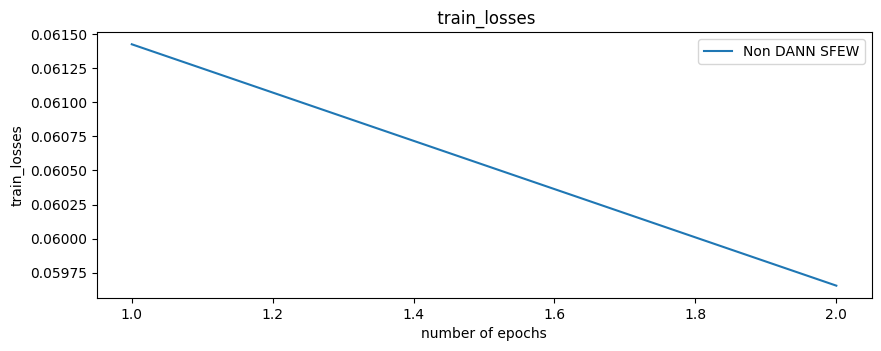

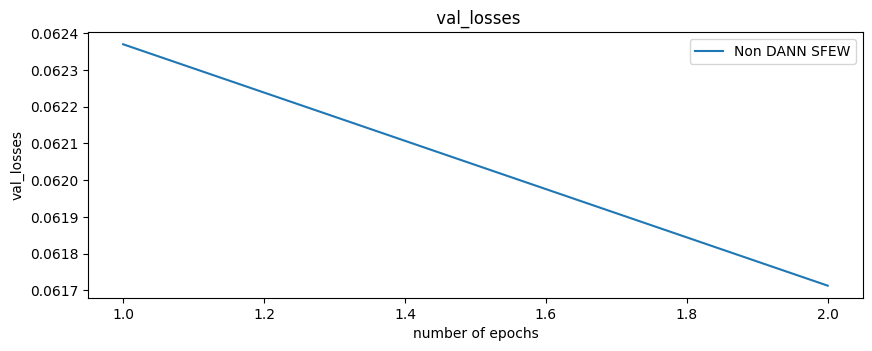

In [23]:
plot_loss_curves(dict_non_dann_losses_list_sfew_expw,mode='train_losses')
plot_loss_curves(dict_non_dann_losses_list_sfew_expw,mode='val_losses')

In [24]:
model_name = model_name #"non_dann_sfew_19_12.pt"

In [25]:
#@title Loading NON DANN Model for DANN and DANN EWC

loaded_model_non_dann = DANN(num_classes=7) # skeleton copy
loaded_model_non_dann.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, model_name),map_location=torch.device(device)))
model_dann = loaded_model_non_dann # saves training time - check with all
model_dann_ewc = loaded_model_non_dann # saves training time - check with all

# print(model_dann)

In [ ]:
# #checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.parameters(), model_dann.parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
# print ('True')

In [26]:
#@title DANN Execution (training and testing) Function without Learning rate

def execute_dann(model,device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss() ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    epoch_converge = epoch
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #TODO: Scheduler

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)


        #TODO: Early Stopping

    # Testing when the training is over - completed or early stopped
    correct, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : 0,
                        'list_alpha' : list_alpha  }

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses





In [27]:
lr_dann = runconfig.inital_lr
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 2 #overide
print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = sfew_train_loader,
                                                    source_val_loader = sfew_val_loader,
                                                    target_train_loader = expw_train_loader,
                                                    target_val_loader = expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain )

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/2] Step [1/30]: loss_total=3.2284 / domain_loss_target=0.7089 / domain_loss_source=0.6634 / task_loss=1.8561 / domain_loss=2.5195 / alpha=0.0000
Epoch [1/2] Step [11/30]: loss_total=3.2471 / domain_loss_target=0.7252 / domain_loss_source=0.6672 / task_loss=1.8547 / domain_loss=2.5219 / alpha=0.6823
Epoch [1/2] Step [21/30]: loss_total=3.2293 / domain_loss_target=0.7334 / domain_loss_source=0.6426 / task_loss=1.8532 / domain_loss=2.4959 / alpha=0.9311
Test / Val: Average loss: 0.0616, Accuracy: 78/436 (17.89%)

epoch = 2...in DANN execution function
Epoch [2/2] Step [1/30]: loss_total=3.2538 / domain_loss_target=0.7342 / domain_loss_source=0.6389 / task_loss=1.8807 / domain_loss=2.5196 / alpha=0.9866
Epoch [2/2] Step [11/30]: loss_total=3.2464 / domain_loss_target=0.7603 / domain_loss_source=0.6246 / task_loss=1.8615 / domain_loss=2.4861 / alpha=0.9975
Epoch [2/2] Step [21/30]: loss_total=3.1706 / domain_loss_target=0.7540 / domain_loss_source=0.6213 / task_loss=1.7953 / domain

In [28]:
dict_dann_losses

{'train_losses': [0.058152, 0.056821],
 'val_losses': [0.06162779785077506, 0.061537626413030365],
 'test_loss_source': 0.06147770132493535,
 'test_loss_target': 0.061086367799321986,
 'epoch_convergence': 0,
 'list_alpha': [0.0,
  0.0831409664335998,
  0.16514041292462944,
  0.2449186624037092,
  0.32151273753163445,
  0.39411856793081457,
  0.4621171572600098,
  0.525083943312195,
  0.5827829453479101,
  0.6351489523872873,
  0.6822617902381698,
  0.7243166860701287,
  0.7615941559557646,
  0.7944319501654966,
  0.8232006455858834,
  0.8482836399575131,
  0.870061661742672,
  0.8889014796847763,
  0.9051482536448667,
  0.9191208703639935,
  0.9311096086675774,
  0.9413755384972873,
  0.9501511467057719,
  0.9576417790898648,
  0.9640275800758169,
  0.969465692239251,
  0.9740925449386082,
  0.9780261147388136,
  0.9813680813098666,
  0.9866142981514305,
  0.988657593972518,
  0.9903904942256809,
  0.9918597245682079,
  0.9931050973968727,
  0.9941605004152159,
  0.9950547536867307,
 

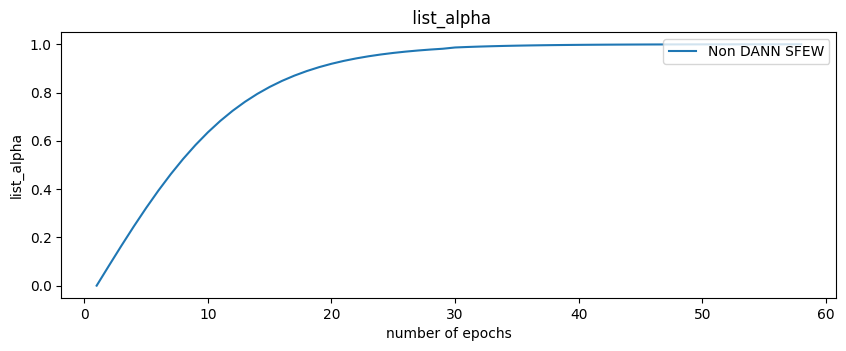

In [29]:
plot_loss_curves(dict_dann_losses,mode='list_alpha')
